# Data Preparation Exercises

The end result of this exercise should be a file named prepare.py.

## Imports

In [83]:
import pandas as pd
import numpy as np
import requests
import acquire
import matplotlib.pyplot as plt

from os import path
from importlib import reload

# Using your store items data:



In [28]:
df = acquire.acquire_all_data()

In [7]:
df.shape

(913000, 14)

In [8]:
df.isnull().sum()

item_id          0
sale_amount      0
sale_date        0
sale_id          0
store_id         0
item_brand       0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
store_address    0
store_city       0
store_state      0
store_zipcode    0
dtype: int64

In [9]:
df.store_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [10]:
df.item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [71]:
df.sale_date.nunique()

AttributeError: 'DataFrame' object has no attribute 'sale_date'

In [12]:
df.sale_date.min(), df.sale_date.max()

('Fri, 01 Apr 2016 00:00:00 GMT', 'Wed, 31 May 2017 00:00:00 GMT')

### Takeaways


## Convert date column to datetime format.


In [29]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')

In [31]:
df.sale_date = df.sale_date.dt.strftime('%Y-%m-%d').astype('datetime64')

### Takeaways
* may be a more efficient way to convert into datetime
* may want to look at having the strftime in teh same line of code
* or stripping out the hours, minutes, zone info first
* ensure correct typing before setting to index

## Plot the distribution of sale_amount and item_price.


<AxesSubplot:>

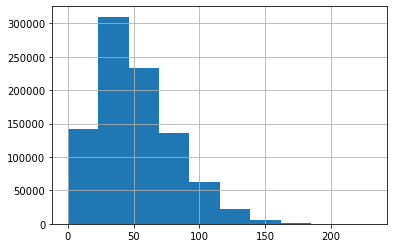

In [24]:
df.sale_amount.hist()

<AxesSubplot:>

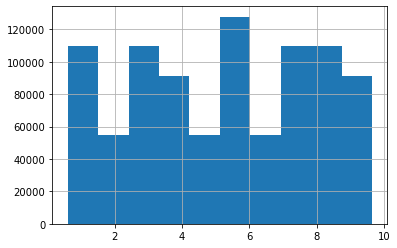

In [25]:
df.item_price.hist()

### Takeaways
* need to take a look at data dictionary if it exists, and find out the units for sale_amount and price
    - assumption is simple count for sale_amount and dollars/cents for item_price
* `sale_amount` appears to have some outliers
* `item_price` appears closer to uniform distribution than a normal distribution 


## Set the index to be the datetime variable.


In [32]:
df = df.set_index('sale_date')

### Takeaways
* Nothing of note


## Add a 'month' and 'day of week' column to your dataframe.


In [35]:
df['month'] = df.index.strftime('%b')

In [37]:
df['day of week'] = df.index.strftime('%a')

In [38]:
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day of week
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Jan,Tue
2013-01-02,1,11.0,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Jan,Wed
2013-01-03,1,14.0,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Jan,Thu
2013-01-04,1,13.0,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Jan,Fri
2013-01-05,1,10.0,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Jan,Sat


### Takeaways
* lower case for abbreviations seems prety standard. 

## Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [40]:
df['sales_total'] = df.sale_amount * df.item_price

### Takeaways
* sale_amount better labled as quantity sold or sale quantity


## Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.




In [41]:
reproduce = acquire.acquire_all_data()

In [73]:
def summarize(df, data='sales'):
    """ 
    """

    if data == 'sales':
        print(f"""
        Shape: {df.shape}\n
        Nulls:\n{df.isnull().sum()}\n
        Unique Stores: {df.store_id.unique()}\n
        Unique Items: {df.item_id.unique()}\n
        Number of Sale Days: {df.index.nunique()}\n
        Sales Date Range: {df.index.min(), df.index.max()}\n
        """)
    elif data == 'ops':
        print(f"""
        {df.info()}
        Shape: {df.shape}\n
        Nulls:\n{df.isnull().sum()}\n
        """)

    for col in df.columns.to_list():
        df[col].hist()
        plt.title(col)
        plt.show();
        
    return

In [91]:
def engineer_features(df, data='sales'):
    """ 
    """

    df['month'] = df.index.strftime('%b')

    if data == 'sales':
        df['day of week'] = df.index.strftime('%a')
        df['sales_total'] = df.sale_amount * df.item_price   
    elif data == 'ops':
        df['year'] = df.index.strftime('%Y')
        
    return df 

In [65]:
def prepare (df, data='sales'):
    """ 
    """

    if data == 'sales':
        df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')
        df.sale_date = df.sale_date.dt.strftime('%Y-%m-%d').astype('datetime64')
        df = df.set_index('sale_date')
    elif data == 'ops':
        df.Date = pd.to_datetime(df.Date)
        df.set_index('Date')

    df = engineer_features(df, data)

    summarize(df)

    return df


    Shape: (913000, 16)

    Nulls:
item_id          0
sale_amount      0
sale_id          0
store_id         0
item_brand       0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
store_address    0
store_city       0
store_state      0
store_zipcode    0
month            0
day of week      0
sales_total      0
dtype: int64

    Unique Stores: [ 1  2  3  4  5  6  7  8  9 10]

    Unique Items: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]

    Number of Unique Sales: 1826

    Sales Date Range: (Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

    


,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day of week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Jan,Tue,10.92
2013-01-02,1,11.0,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Jan,Wed,9.24
2013-01-03,1,14.0,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Jan,Thu,11.76
2013-01-04,1,13.0,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Jan,Fri,10.92
2013-01-05,1,10.0,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Jan,Sat,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,50,63.0,912996,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,Dec,Wed,327.60
2017-12-28,50,59.0,912997,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,Dec,Thu,306.80
2017-12-29,50,74.0,912998,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,Dec,Fri,384.80


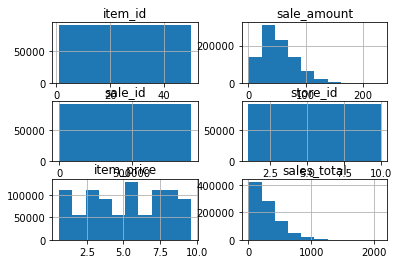

In [66]:
prepare(reproduce)

### Takeaways
* need to send kwargs in with df.hist() for better display
* adjust formatting for summarize function
* add comments and docstring
* think about splitting the indexing operations to another function


# Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [67]:
ops = acquire.acquire_energy()

In [68]:
ops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


## Convert date column to datetime format.


In [78]:
ops.Date = pd.to_datetime(ops.Date)

### Takeaways
* nothing of note. make sure to change ops to df when importing to the other function

## Plot the distribution of each of your variables.


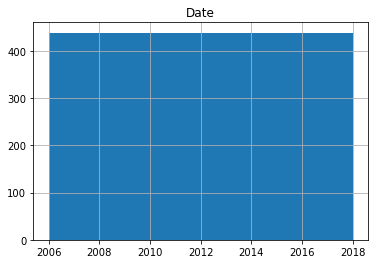

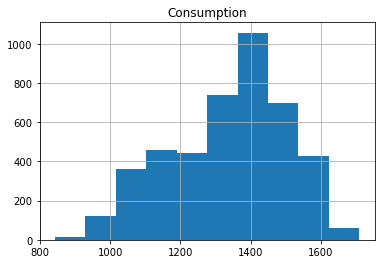

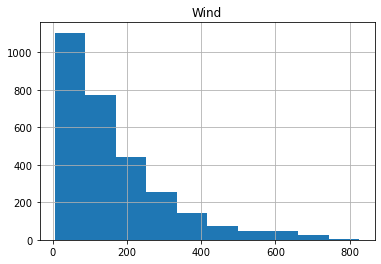

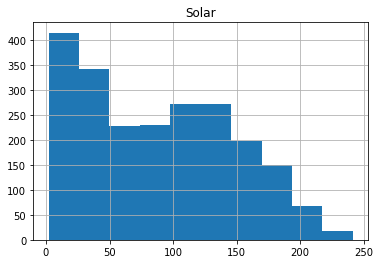

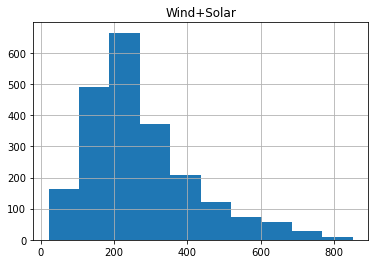

In [85]:
for col in ops.columns.to_list():
    ops[col].hist()
    plt.title(col)
    plt.show();

### Takeaways
* date uniform
* consumption somehwate normal
* wind and wind + solar have clear right skew
    * possible indicator of outliers
* solar is skewed but not as dramatci


## Set the index to be the datetime variable.


In [87]:
ops = ops.set_index('Date')

### Takeaways
* nothing of note


## Add a month and a year column to your dataframe.


In [89]:
ops['month'] = ops.index.strftime('%b')

In [90]:
ops['year'] = ops.index.strftime('%Y')

### Takeaways


## Fill any missing values.
* worht it to try and visualize wear the nulls are at in the data


### Takeaways


## Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

### Takeaways
